In [1]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
X_train: (60000, 28, 28)


In [ ]:
X_train: (60000, 28, 28)


In [4]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]*train_X.shape[2]) 


In [5]:
print('X_train: ' + str(train_X.shape))
print('X_train: ' + str(train_X[1].shape))


X_train: (60000, 784)
X_train: (784,)


Divide each pixel value by 255 so that all values are between 0 and 1. At this point, your X array should have shape (num_examples, 784) and have values between 0 and 1.


In [6]:
train_X = train_X/255


In [7]:
train_y


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
model=clf.fit(train_X, train_y)


/Users/chiragjain/Developer/venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/chiragjain/Developer/venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/chiragjain/Developer/venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [10]:
import numpy as np
prob= (np.exp(model.feature_log_prob_)[0])
prob

array([1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 3.37552743e-04,
       3.37552743e-04, 3.37552743e-04, 1.68776371e-04, 3.37552743e-04,
       3.37552743e-04, 3.37552743e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
       1.68776371e-04, 1.68776371e-04, 1.68776371e-04, 1.68776371e-04,
      

In [11]:
gen_image = [0 if i < 0.5 else 1 for i in prob]
gen_image =np.array(gen_image)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

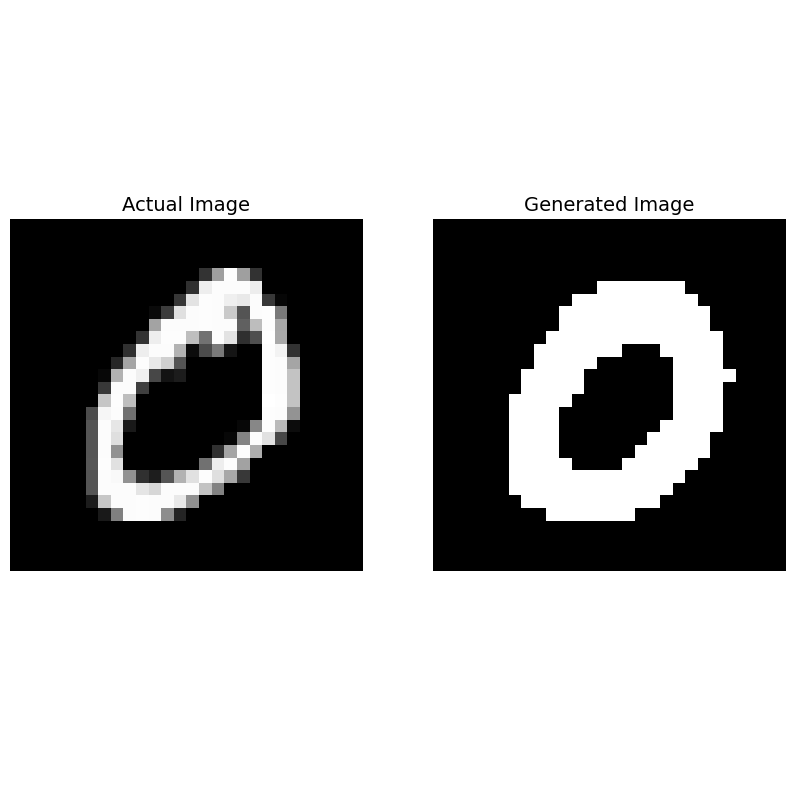

In [12]:
import matplotlib.pyplot as plt
# set up the canvas for the subplots
plt.figure(figsize=(10,10))
plt.axis('Off')
# image
plt.subplot(1,2,1)
plt.imshow(train_X[1].reshape(28,28),cmap='gray')
plt.title('Actual Image', fontsize=14)
plt.axis('off')
# image
plt.subplot(1,2,2)
plt.imshow(gen_image.reshape(28,28),cmap='gray')
plt.title('Generated Image', fontsize=14)
plt.axis('off')
